In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
transform = transforms.ToTensor()

In [37]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

In [38]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [39]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [40]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [41]:
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = False)

In [42]:
# 1 COLOR CHANNEL, 6 FILTERS (OUTPUT CHANNELS), 3BY3 KERNEL, STRIDE=1
conv1 = nn.Conv2d(1,6,3,1)  # --> 6 filters --> pooling --> conv2

# 6 INPUT FILTERS CONV1, 16 FILTERS, 3BY3 KERNEL, STRIDE=1
conv2 = nn.Conv2d(6,16,3,1)

In [43]:
for i, (X_train, y_train) in enumerate(train_data):
    break

In [44]:
X_train.shape   # --> 4D batch (batch of 1 image)

torch.Size([1, 28, 28])

In [45]:
X_train.view(1,1,28,28)   # --> 4D batch (batch of 1 image)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [46]:
x = X_train.view(1,1,28,28)

In [47]:
x

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [48]:
x = F.relu(conv1(x))

In [49]:
x.shape

torch.Size([1, 6, 26, 26])

In [50]:
F.max_pool2d(x,2,2)

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.5724, 0.3186, 0.0000],
          [0.0000, 0.0000, 0.0367,  ..., 0.4263, 0.0866, 0.0000],
          ...,
          [0.0000, 0.2094, 0.4921,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.2622, 0.4346,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.2401, 0.2401, 0.2401,  ..., 0.2401, 0.2401, 0.2401],
          [0.2401, 0.2401, 0.2401,  ..., 0.2401, 0.2401, 0.2401],
          [0.2401, 0.2401, 0.2401,  ..., 0

In [51]:
x = F.max_pool2d(x,2,2)

In [52]:
x.shape

torch.Size([1, 6, 13, 13])

In [53]:
x = F.relu(conv2(x))

In [54]:
x.shape

torch.Size([1, 16, 11, 11])

In [55]:
x = F.max_pool2d(x,2,2)

In [56]:
x.shape

torch.Size([1, 16, 5, 5])

In [57]:
11/2

5.5

In [58]:
(((28-2)/2)-2)/2

5.5

In [59]:
x.shape #10

torch.Size([1, 16, 5, 5])

In [60]:
x.view(-1,16*5*5).shape

torch.Size([1, 400])

In [61]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,16*5*5)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X,dim=1)

In [62]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [63]:
for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


60074

In [64]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [65]:
import time

start_time = time.time()

# VARIABLES (TRACKERS)
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# FOR LOOP EPOCHS
for i in range(epochs):

    trn_corr = 0
    tst_corr = 0

    # TRAIN
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        y_pred = model(X_train) # NOT FLATTEN!
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()   # True 1/ False 0 sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%600 == 0:
            print(f"EPOCH: {i} BATCH: {b} LOSS: {loss.item()}")

    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())

    # TEST
    with torch.no_grad():
        for b, (X_test,y_test) in enumerate(test_loader):

            y_val = model(X_test)

            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss.item())
    test_correct.append(tst_corr.item())


current_time = time.time()
total = current_time - start_time
print(f"Training took {total/60} minutes")

EPOCH: 0 BATCH: 600 LOSS: 0.04255055636167526
EPOCH: 0 BATCH: 1200 LOSS: 0.07605955749750137
EPOCH: 0 BATCH: 1800 LOSS: 0.36373868584632874
EPOCH: 0 BATCH: 2400 LOSS: 0.026480570435523987
EPOCH: 0 BATCH: 3000 LOSS: 0.008208819665014744
EPOCH: 0 BATCH: 3600 LOSS: 0.0015681401127949357
EPOCH: 0 BATCH: 4200 LOSS: 0.5645227432250977
EPOCH: 0 BATCH: 4800 LOSS: 0.032551269978284836
EPOCH: 0 BATCH: 5400 LOSS: 0.012761639431118965
EPOCH: 0 BATCH: 6000 LOSS: 0.03970568627119064
EPOCH: 1 BATCH: 600 LOSS: 0.017279036343097687
EPOCH: 1 BATCH: 1200 LOSS: 0.04749082773923874
EPOCH: 1 BATCH: 1800 LOSS: 0.0017229963559657335
EPOCH: 1 BATCH: 2400 LOSS: 0.023712072521448135
EPOCH: 1 BATCH: 3000 LOSS: 0.36390501260757446
EPOCH: 1 BATCH: 3600 LOSS: 0.0002608378417789936
EPOCH: 1 BATCH: 4200 LOSS: 0.0006656918558292091
EPOCH: 1 BATCH: 4800 LOSS: 0.0010004624491557479
EPOCH: 1 BATCH: 5400 LOSS: 0.0014125412562862039
EPOCH: 1 BATCH: 6000 LOSS: 0.0028948839753866196
EPOCH: 2 BATCH: 600 LOSS: 0.001999843399971

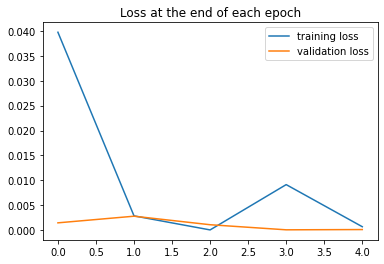

In [66]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

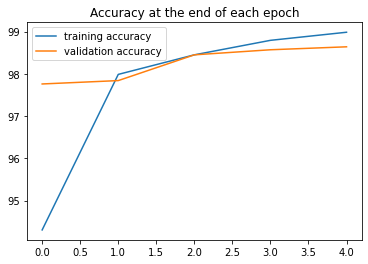

In [68]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [70]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [71]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [72]:
correct.item()/len(test_data)

0.9864

In [74]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 974    0    0    0    0    2    3    1    2    1]
 [   0 1133    3    0    0    0    5    6    0    1]
 [   2    0 1024    3    0    0    0    6    4    0]
 [   0    1    1 1000    0   13    0    1    1    2]
 [   0    0    1    0  981    1    3    2    3   21]
 [   0    0    0    1    0  864    0    0    0    1]
 [   3    1    0    0    0    4  945    0    1    0]
 [   1    0    3    2    0    1    0 1009    2    5]
 [   0    0    0    3    0    4    2    1  957    1]
 [   0    0    0    1    1    3    0    2    4  977]]


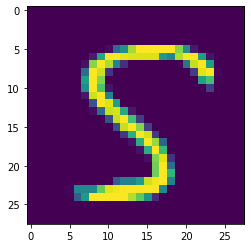

In [82]:
plt.imshow(test_data[333][0].reshape(28,28))

In [83]:
model.eval()

with torch.no_grad():
    new_prediction = model(test_data[333][0].view(1,1,28,28))

In [84]:
new_prediction.argmax()

tensor(5)

In [85]:
test_data[333][1]

5